In [1]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [3]:
# load the data
df = pd.read_csv("heart_2020_cleaned.csv")
df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

# EDA

In [4]:
# Apply pie chart to show feature distrubution
from plotly.subplots import make_subplots
import plotly.graph_objs as go

fig = make_subplots(
    rows=7, cols=2, subplot_titles=("HeartDisease", "Smoking",
                                    "AlcoholDrinking","Stroke",
                                    "DiffWalking", "Sex","Race",'PhysicalActivity','Diabetic','GenHealth','Asthma','KidneyDisease','SkinCancer'
                                    ),
    specs=[[{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}]],
)

colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

fig.add_trace(go.Pie(labels=np.array(df['HeartDisease'].value_counts().index),
                     values=[x for x in df['HeartDisease'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=1, col=1)

fig.add_trace(go.Pie(labels=np.array(df['Smoking'].value_counts().index),
                     values=[x for x in df['Smoking'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=1, col=2)

fig.add_trace(go.Pie(labels=np.array(df['AlcoholDrinking'].value_counts().index),
                     values=[x for x in df['AlcoholDrinking'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=2, col=1)

fig.add_trace(go.Pie(labels=np.array(df['Stroke'].value_counts().index),
                     values=[x for x in df['Stroke'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=2, col=2)

fig.add_trace(go.Pie(labels=np.array(df['DiffWalking'].value_counts().index),
                     values=[x for x in df['DiffWalking'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=3, col=1)

fig.add_trace(go.Pie(labels=np.array(df['Sex'].value_counts().index),
                     values=[x for x in df['Sex'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=3, col=2)

fig.add_trace(go.Pie(labels=np.array(df['Race'].value_counts().index),
                     values=[x for x in df['Race'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=4, col=1)

fig.add_trace(go.Pie(labels=np.array(df['PhysicalActivity'].value_counts().index),
                     values=[x for x in df['PhysicalActivity'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=4, col=2)

fig.add_trace(go.Pie(labels=np.array(df['Diabetic'].value_counts().index),
                     values=[x for x in df['Diabetic'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=5, col=1)

fig.add_trace(go.Pie(labels=np.array(df['GenHealth'].value_counts().index),
                     values=[x for x in df['GenHealth'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=5, col=2)

fig.add_trace(go.Pie(labels=np.array(df['Asthma'].value_counts().index),
                     values=[x for x in df['Asthma'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=6, col=1)

fig.add_trace(go.Pie(labels=np.array(df['KidneyDisease'].value_counts().index),
                     values=[x for x in df['KidneyDisease'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=6, col=2)

fig.add_trace(go.Pie(labels=np.array(df['SkinCancer'].value_counts().index),
                     values=[x for x in df['SkinCancer'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=7, col=1)


fig.update_layout(height=3200, font=dict(size=14), showlegend=False)

fig.show()

### Analysis on Numerical Features

In [5]:
df_numerical = df._get_numeric_data()
df_numerical.describe()

BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000

{'whiskers': [<matplotlib.lines.Line2D at 0x7fec32fb73d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fec32fb7a10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fec32fb7050>,
 'medians': [<matplotlib.lines.Line2D at 0x7fec32fcc110>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fec32fcc790>,
 'means': [<matplotlib.lines.Line2D at 0x7fec32fcc450>,
  <matplotlib.lines.Line2D at 0x7fec33009510>]}

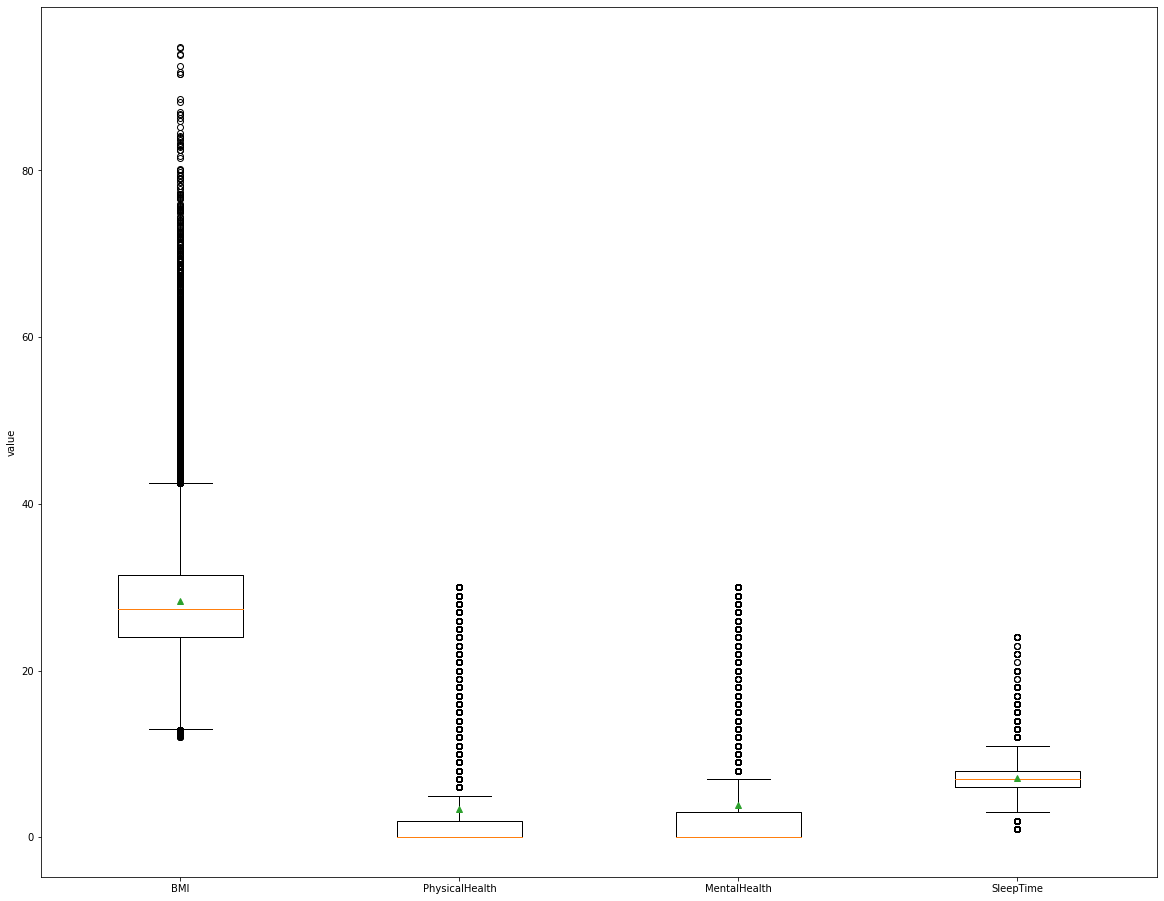

In [6]:
plt.figure(figsize=(20, 16))
values = []
for col in df_numerical.columns:
    values.append(df_numerical[col])
plt.ylabel('value')
plt.boxplot(values, showmeans=True, labels=df_numerical.columns)

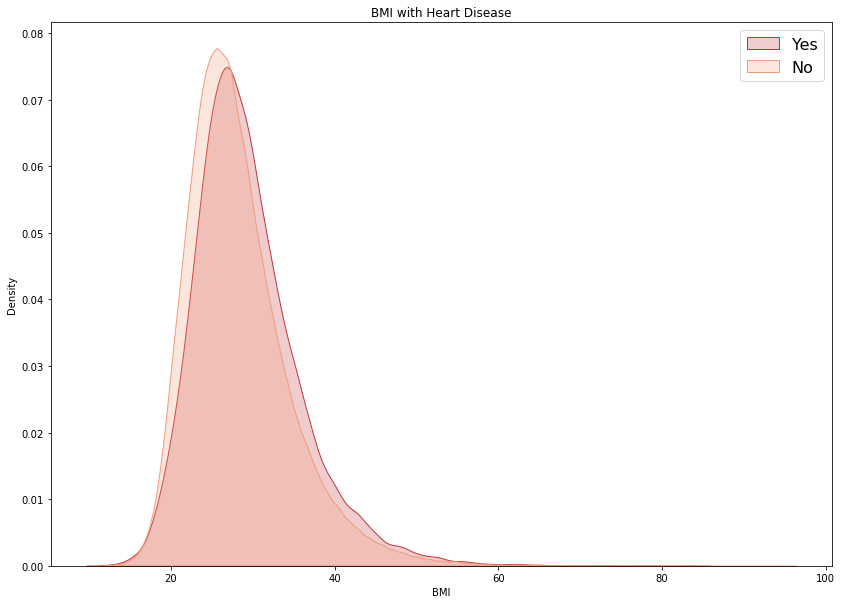

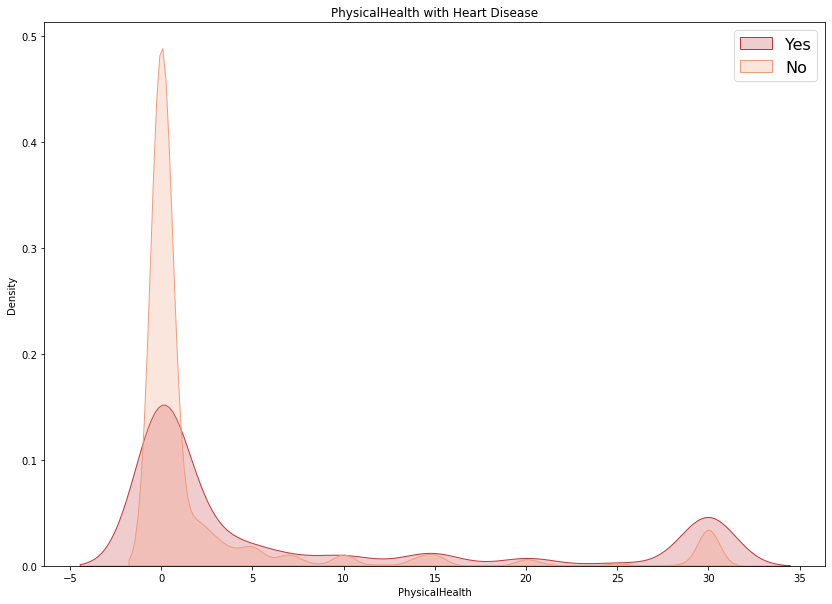

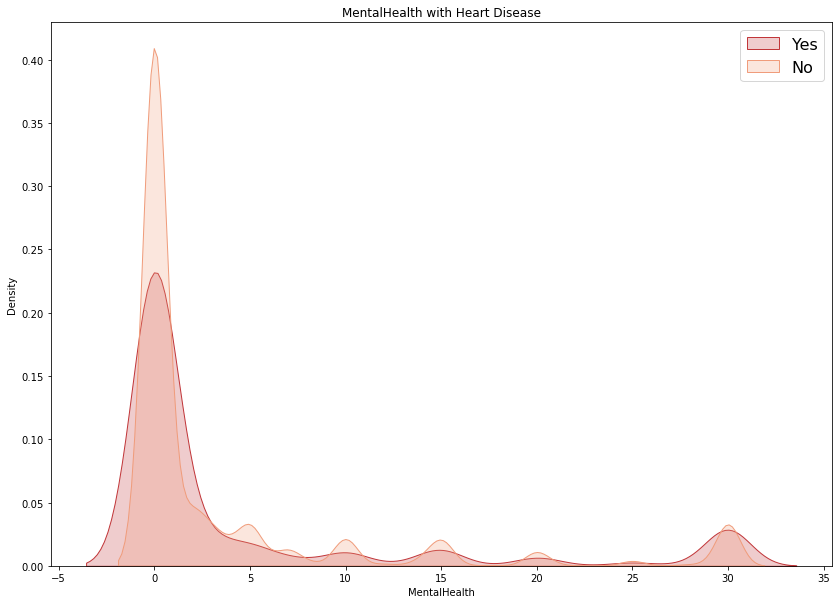

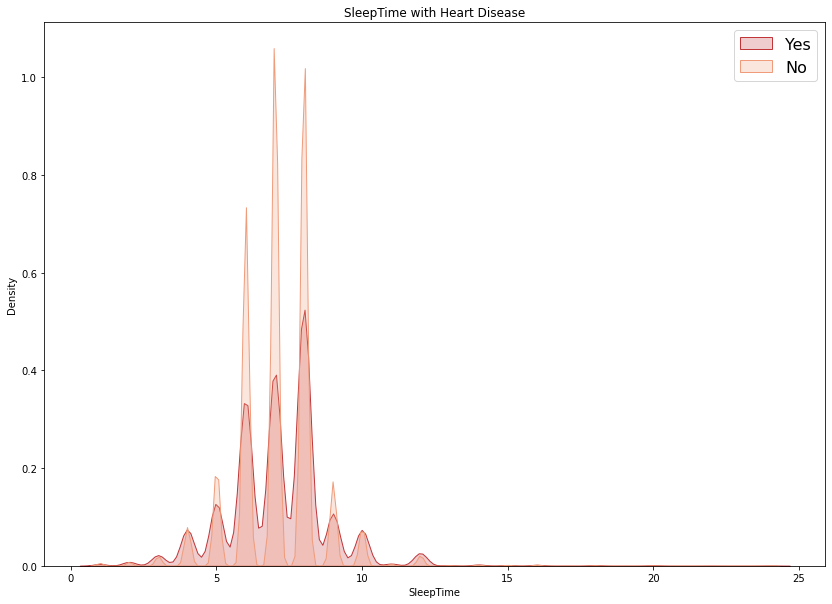

In [7]:
# kde plot for each (numerical feature, heartDisease) pair
cs = sns.color_palette("RdGy")
sns.set_palette(cs)

for numerical_feature in df_numerical.columns:
    fig, ax = plt.subplots(figsize = (14,10))
    sns.kdeplot(df.loc[(df['HeartDisease']=='Yes'), numerical_feature], shade=True, label='Yes')
    sns.kdeplot(df.loc[(df['HeartDisease']=='No'), numerical_feature], shade=True, label='No')
    plt.legend(fontsize=16)
    plt.title(f"{numerical_feature} with Heart Disease")

/Users/luyingxue/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Text(0.5, 1.0, 'Triangle Correlation Heatmap')

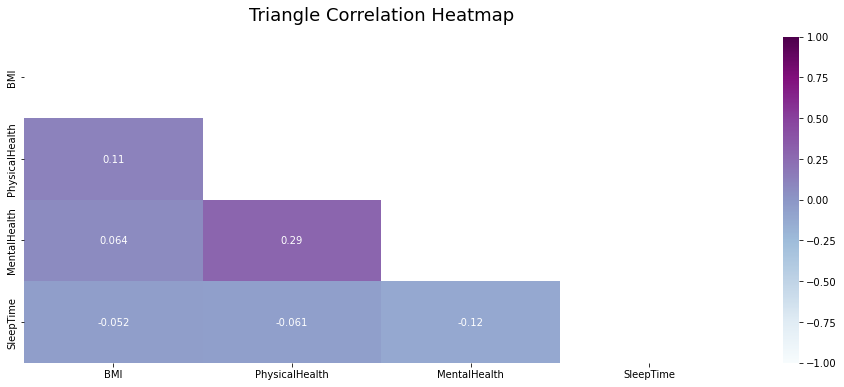

In [15]:
# Correlation among numerical features
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_numerical.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_numerical.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BuPu')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

### Analysis on Nomial Features

In [16]:
df_nomial = df.drop(df_numerical.columns, inplace=False, axis=1)
df_nomial.drop(['HeartDisease'], inplace=True, axis=1)
df_nomial.head()

Smoking AlcoholDrinking Stroke DiffWalking     Sex  AgeCategory   Race  \
0     Yes              No     No          No  Female        55-59  White   
1      No              No    Yes          No  Female  80 or older  White   
2     Yes              No     No          No    Male        65-69  White   
3      No              No     No          No  Female        75-79  White   
4      No              No     No         Yes  Female        40-44  White   

  Diabetic PhysicalActivity  GenHealth Asthma KidneyDisease SkinCancer  
0      Yes              Yes  Very good    Yes            No        Yes  
1       No              Yes  Very good     No            No         No  
2      Yes              Yes       Fair    Yes            No         No  
3       No               No       Good     No            No        Yes  
4       No              Yes  Very good     No            No         No

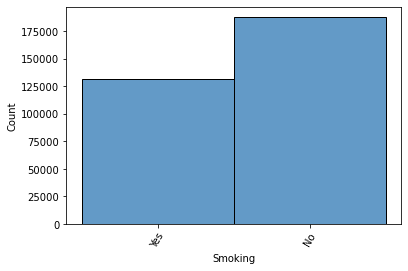

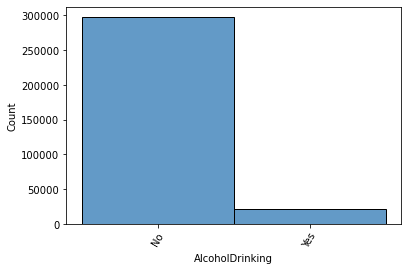

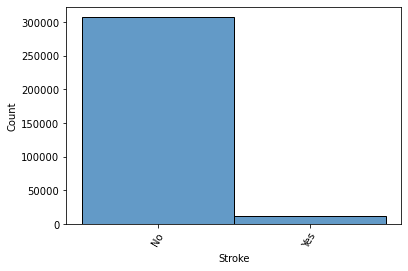

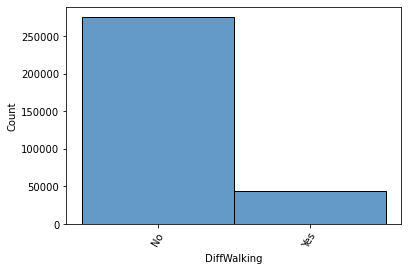

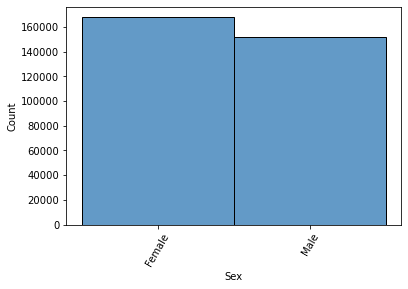

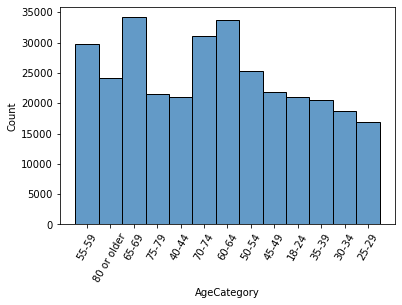

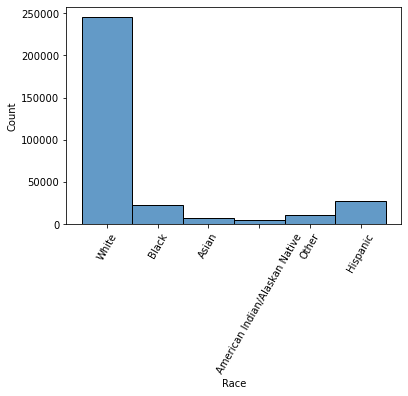

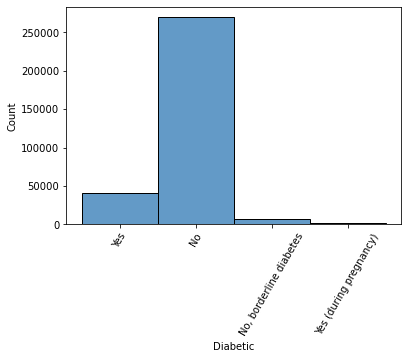

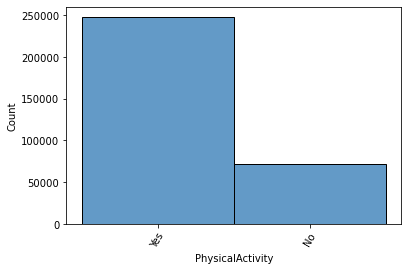

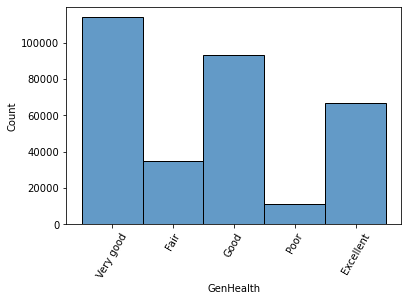

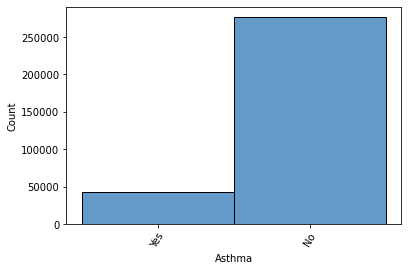

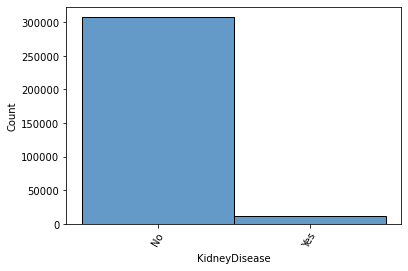

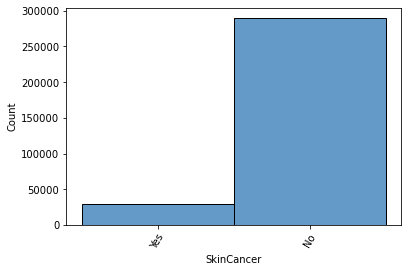

In [17]:
cs = sns.color_palette("RdBu_r")
sns.set_palette(cs)
for col in df_nomial.columns:
    sns.histplot(df_nomial[col])
    plt.xticks(rotation=60)
    plt.show()

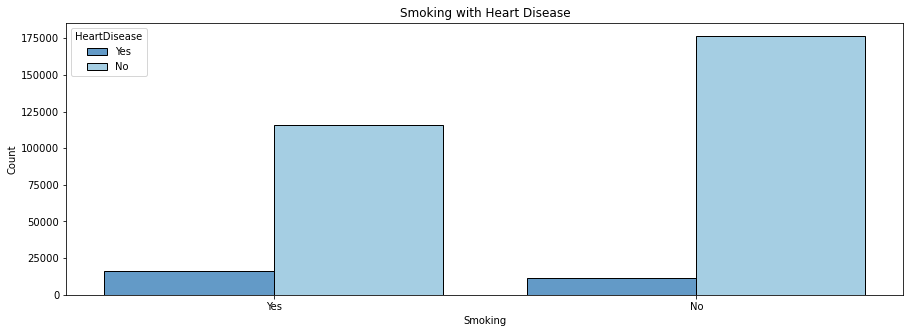

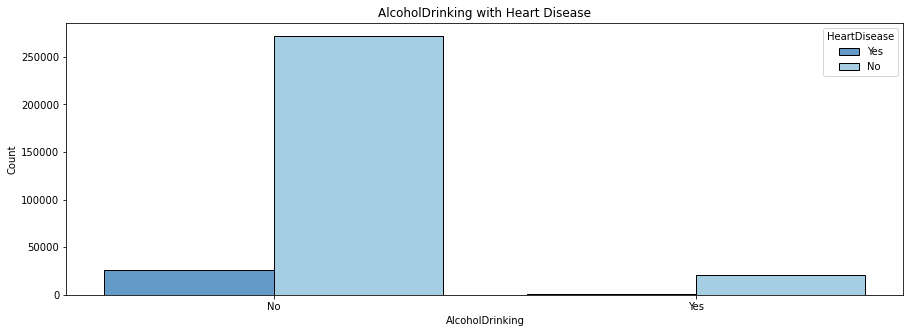

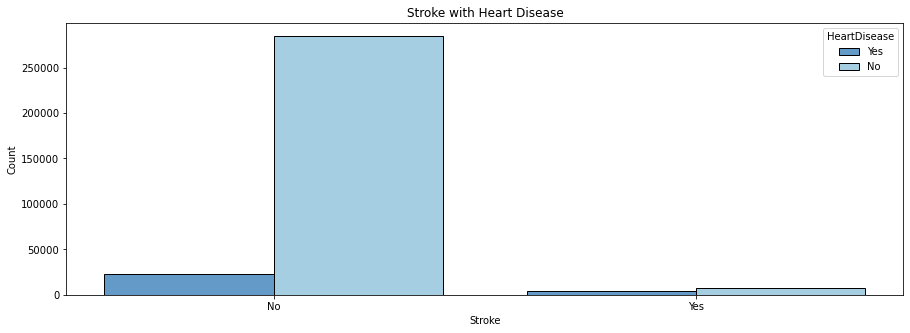

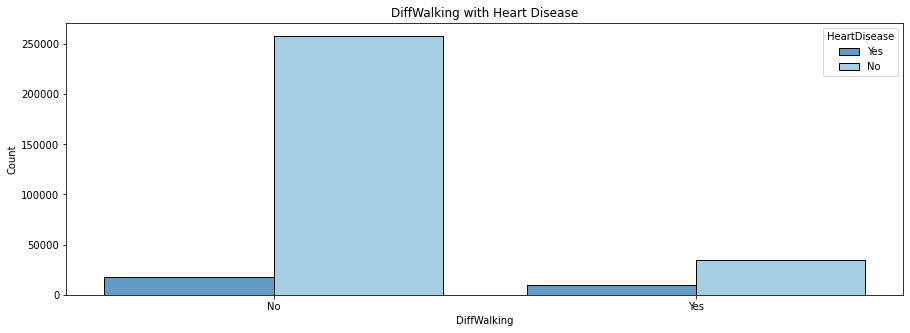

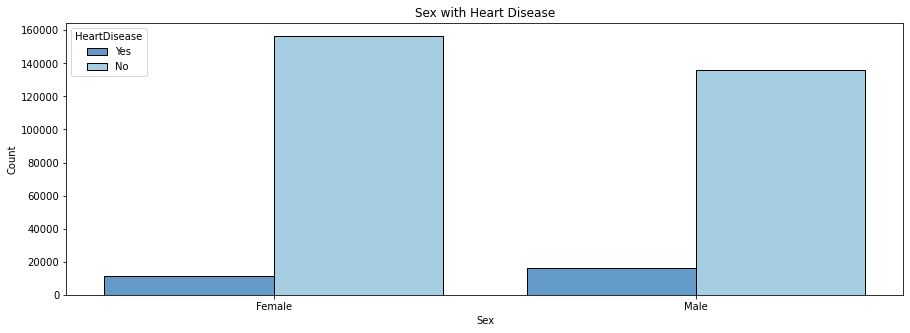

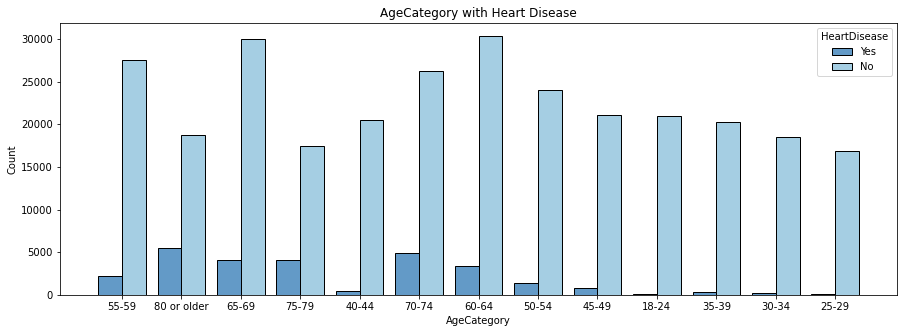

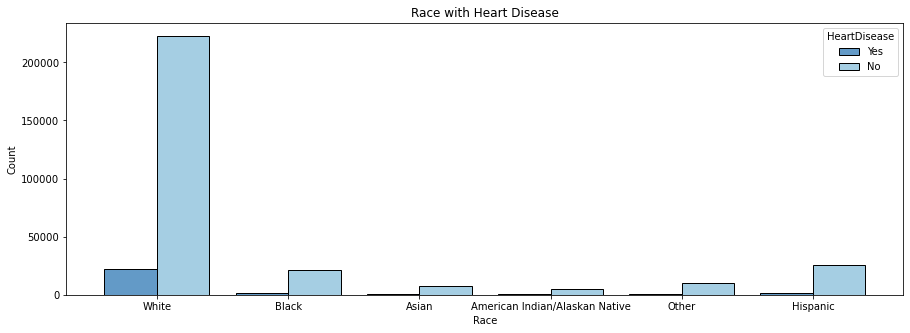

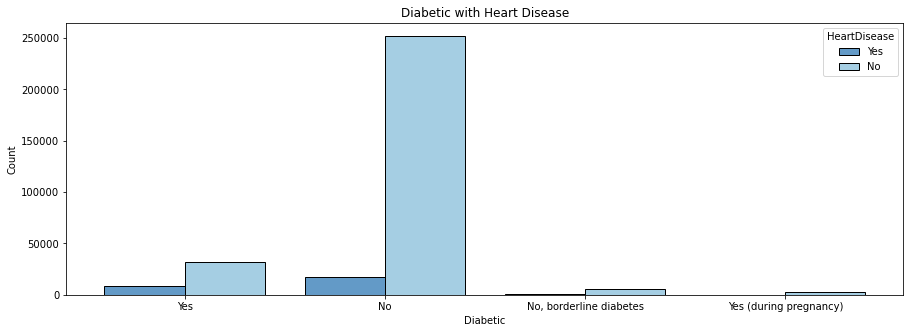

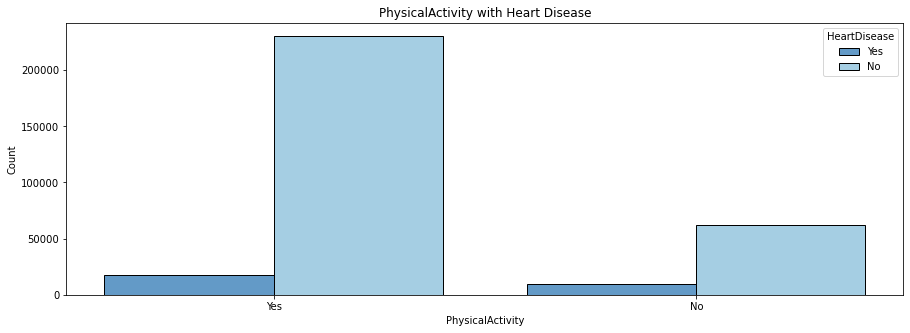

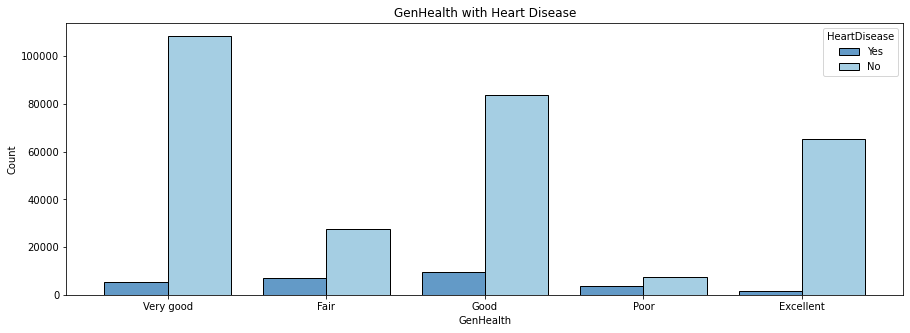

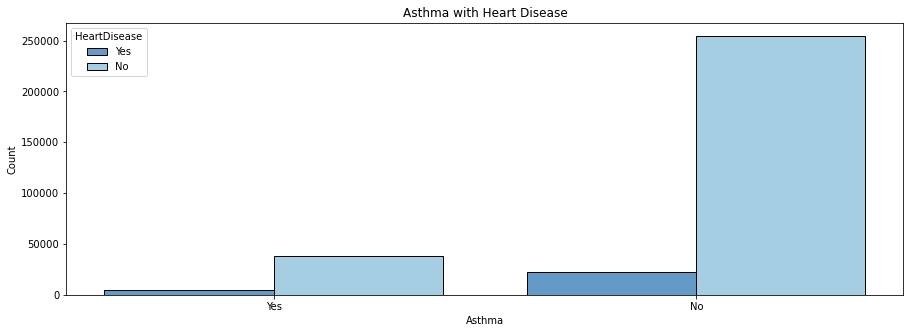

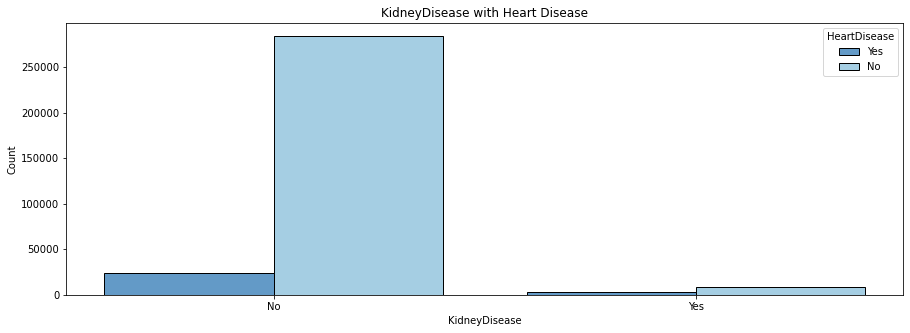

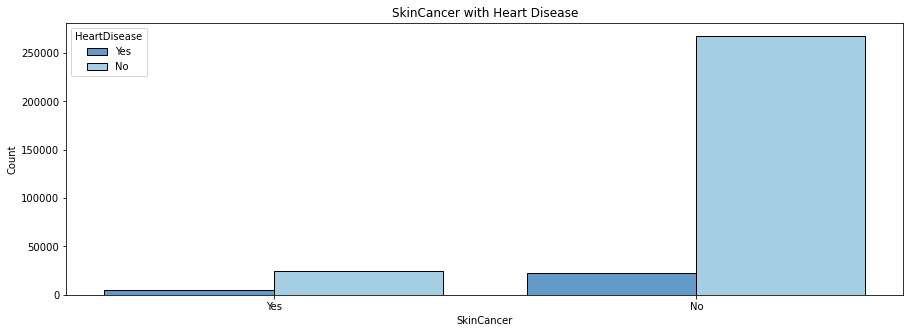

In [18]:
for col in df_nomial.columns:   
    figure, axis = plt.subplots(1, 1, figsize=(15, 5))
    sns.histplot(data=df, x=col, hue="HeartDisease", multiple="dodge", shrink=.8, hue_order = ['Yes', 'No'])
    plt.title(f'{col} with Heart Disease')
    plt.show()

In [19]:
# Correlation
def encoding(v):
    if v.eq("Yes"):
        return 1
    return 0
df_nomial_corr = df_nomial.drop(['Sex', 'AgeCategory', 'GenHealth', 'Race'], axis=1, inplace=False)
# for col in df_nomial_corr.columns:
#     df_nomial_corr[col].apply(encoding)
# df_nomial_corr.head()
for col in df_nomial_corr.columns:
    df_nomial_corr[col] = df_nomial_corr[col].map({'Yes': 1, 'No': 0})
df_nomial_corr.head()

Smoking  AlcoholDrinking  Stroke  DiffWalking  Diabetic  PhysicalActivity  \
0        1                0       0            0       1.0                 1   
1        0                0       1            0       0.0                 1   
2        1                0       0            0       1.0                 1   
3        0                0       0            0       0.0                 0   
4        0                0       0            1       0.0                 1   

   Asthma  KidneyDisease  SkinCancer  
0       1              0           1  
1       0              0           0  
2       1              0           0  
3       0              0           1  
4       0              0           0

/Users/luyingxue/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Text(0.5, 1.0, 'Triangle Correlation Heatmap')

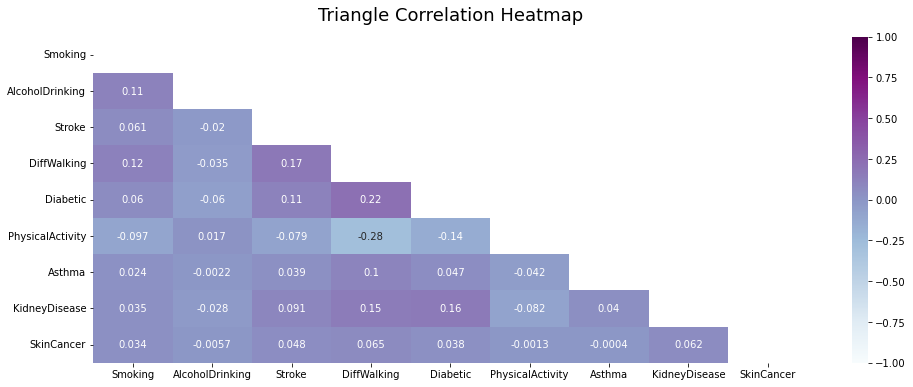

In [20]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_nomial_corr.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_nomial_corr.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BuPu')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

# Preprocessing

In [21]:
# check NaN value
df.isnull().sum().sum()

0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [23]:
df.describe()

BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000

In [24]:
# standarize the numerical features
from sklearn.preprocessing import StandardScaler
num_cols = ['MentalHealth', 'BMI', 'PhysicalHealth', 'SleepTime']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

HeartDisease       BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No -1.844750     Yes              No     No       -0.046751   
1           No -1.256338      No              No    Yes       -0.424070   
2           No -0.274603     Yes              No     No        2.091388   
3           No -0.647473      No              No     No       -0.424070   
4           No -0.726138      No              No     No        3.097572   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0      3.281069          No  Female        55-59  White      Yes   
1     -0.490039          No  Female  80 or older  White       No   
2      3.281069          No    Male        65-69  White      Yes   
3     -0.490039          No  Female        75-79  White       No   
4     -0.490039         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good  -1.460354    Yes            No        Yes  
1              Yes  Very good  -0.067601     No            No         No  
2              Yes       Fair   0.628776    Yes            No         No  
3               No       Good  -0.763977     No            No        Yes  
4              Yes  Very good   0.628776     No            No         No

In [25]:
# split our target column from feature columns
y = pd.DataFrame(df['HeartDisease'])
X = df.drop(['HeartDisease'], axis=1, inplace=False)

In [26]:
# Encoding nomial features
X = pd.get_dummies(X)
X.head()

BMI  PhysicalHealth  MentalHealth  SleepTime  Smoking_No  Smoking_Yes  \
0 -1.844750       -0.046751      3.281069  -1.460354           0            1   
1 -1.256338       -0.424070     -0.490039  -0.067601           1            0   
2 -0.274603        2.091388      3.281069   0.628776           0            1   
3 -0.647473       -0.424070     -0.490039  -0.763977           1            0   
4 -0.726138        3.097572     -0.490039   0.628776           1            0   

   AlcoholDrinking_No  AlcoholDrinking_Yes  Stroke_No  Stroke_Yes  ...  \
0                   1                    0          1           0  ...   
1                   1                    0          0           1  ...   
2                   1                    0          1           0  ...   
3                   1                    0          1           0  ...   
4                   1                    0          1           0  ...   

   GenHealth_Fair  GenHealth_Good  GenHealth_Poor  GenHealth_Very good  \
0               0               0               0                    1   
1               0               0               0                    1   
2               1               0               0                    0   
3               0               1               0                    0   
4               0               0               0                    1   

   Asthma_No  Asthma_Yes  KidneyDisease_No  KidneyDisease_Yes  SkinCancer_No  \
0          0           1                 1                  0              0   
1          1           0                 1                  0              1   
2          0           1                 1                  0              1   
3          1           0                 1                  0              0   
4          1           0                 1                  0              1   

   SkinCancer_Yes  
0               1  
1               0  
2               0  
3               1  
4               0  

[5 rows x 50 columns]

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 50 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   BMI                                  319795 non-null  float64
 1   PhysicalHealth                       319795 non-null  float64
 2   MentalHealth                         319795 non-null  float64
 3   SleepTime                            319795 non-null  float64
 4   Smoking_No                           319795 non-null  uint8  
 5   Smoking_Yes                          319795 non-null  uint8  
 6   AlcoholDrinking_No                   319795 non-null  uint8  
 7   AlcoholDrinking_Yes                  319795 non-null  uint8  
 8   Stroke_No                            319795 non-null  uint8  
 9   Stroke_Yes                           319795 non-null  uint8  
 10  DiffWalking_No                       319795 non-null  uint8  
 11  DiffWalking_Y

In [28]:
# Check the distribution of target classes
from collections import Counter
c = Counter(y)
c

Counter({'HeartDisease': 1})

<AxesSubplot:xlabel='HeartDisease', ylabel='Count'>

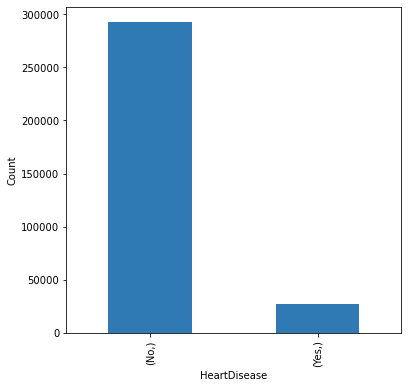

In [29]:
# Virtualize the target distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.xlabel("HeartDisease")
plt.ylabel("Count")
y.value_counts().plot(kind='bar')

In [30]:
# Convert yes/no in "HeartDisease" (our target) to be 1/0
print(type(y))
y.loc[y.HeartDisease == 'No', 'HeartDisease'] = 0
y.loc[y.HeartDisease == 'Yes', 'HeartDisease'] = 1
y['HeartDisease'] = y.HeartDisease.astype(uint8)
y.info()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   HeartDisease  319795 non-null  uint8
dtypes: uint8(1)
memory usage: 312.4 KB


In [31]:
from imblearn.over_sampling import BorderlineSMOTE
oversample = BorderlineSMOTE(random_state=42)
X_oversampled, y_oversampled = oversample.fit_resample(X.to_numpy(), y.to_numpy())

In [32]:
counter = Counter(y_oversampled)
print(counter)

Counter({0: 292422, 1: 292422})


(array([292422.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 292422.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

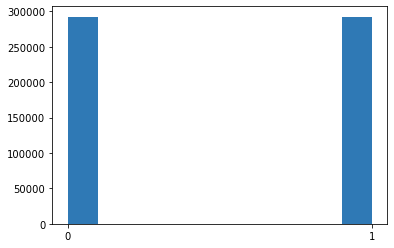

In [33]:
# virtualize the new distribution of y after oversampling
plt.xticks([0, 1])
plt.hist(y_oversampled)

In [34]:
# Split the dataset into training/testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, shuffle = True, test_size = 0.2)
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (467875, 50)
Shape of testing feature: (116969, 50)
Shape of training label: (467875,)
Shape of training label: (116969,)


In [35]:
# check for outliers
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)
mask = yhat != -1
# print(yhat)
# print(X_train[mask])
X_train, y_train = X_train[mask], y_train[mask]
print('Shape of training feature:', X_train.shape)
print('Shape of training label:', y_train.shape)

Shape of training feature: (421087, 50)
Shape of training label: (421087,)


# Model Training

### Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [37]:
def plot_conf_matrix(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data=conf_matrix, columns=['No', 'Yes'], index=['No', 'Yes'])
    sns.heatmap(conf_matrix, annot=True)

accuracy_score:0.7581153980969316
recall_score:0.9010049907704929
f1_score:0.78842400448682


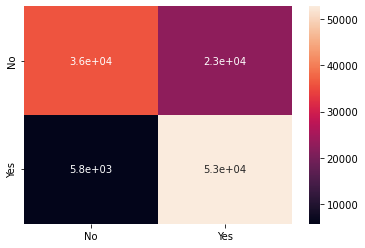

In [38]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)


plot_conf_matrix(y_test, y_pred)

print(f'accuracy_score:{accuracy_score(y_test, y_pred)}')  
print(f'recall_score:{recall_score(y_test, y_pred)}')  
print(f'f1_score:{f1_score(y_test, y_pred)}')

### Neural Network

In [41]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Using TensorFlow backend.


In [42]:
# import tensorflow as tf
# define a neural network
def Net():
    model = Sequential()
    model.add(Dense(input_dim=50, activation="relu", units=18))
    model.add(Dense(kernel_initializer="normal", activation="relu", units=12))
    model.add(Dense(kernel_initializer="normal", units=1))
    model.compile(loss="mean_squared_error", optimizer="adam")
    return model

In [43]:
estimator = KerasRegressor(build_fn=Net, epochs=10, batch_size=5)
estimator.fit(X_train, y_train)

2022-05-05 00:52:48.407542: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-05 00:52:48.409342: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 10. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/10
421087/421087 [==============================] - 103s 245us/step - loss: 0.1369
Epoch 2/10
421087/421087 [==============================] - 99s 235us/step - loss: 0.1320
Epoch 3/10
421087/421087 [==============================] - 107s 254us/step - loss: 0.1279
Epoch 4/10
421087/421087 [==============================] - 108s 256us/step - loss: 0.1248
Epoch 5/10
421087/421087 [==============================] - 109s 259us/step - loss: 0.1233
Epoch 6/10
421087/421087 [==============================] - 110s 261us/step - loss: 0.1221
Epoch 7/10
421087/421087 [==============================] - 108s 255us/step - loss: 0.1212
Epoch 8/10
421087/421087 [==============================] - 106s 252us/step - loss: 0.1207
Epoch 9/10
421087/421087 [==============================] - 106s 253us/step - loss: 0.1203
Epoch 10/10
421087/421087 [==============================] - 108s 255us/step - loss: 0.1199


accuracy_score:0.8312544349357522
recall_score:0.8484480754768579
f1_score:0.8341623256595531


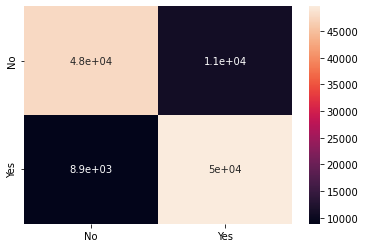

In [44]:
y_pred_2 = estimator.predict(X_test)
y_pred_2 = y_pred_2>0.5

plot_conf_matrix(y_test, y_pred_2)
print(f'accuracy_score:{accuracy_score(y_test, y_pred_2)}')  
print(f'recall_score:{recall_score(y_test, y_pred_2)}')  
print(f'f1_score:{f1_score(y_test, y_pred_2)}')

### SGD

In [45]:
# SGD classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
y_pred = sgd_clf.predict(X_test)

accuracy_score:0.8068975540527832
recall_score:0.8854173788199904
f1_score:0.821015095685249


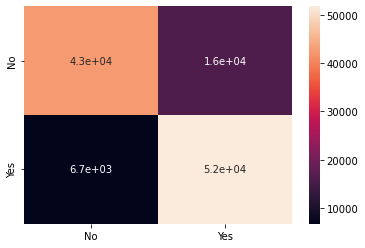

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

plot_conf_matrix(y_test, y_pred)

print(f'accuracy_score:{accuracy_score(y_test, y_pred)}')
print(f'recall_score:{recall_score(y_test, y_pred)}')
print(f'f1_score:{f1_score(y_test, y_pred)}')

### Random Forest Model

In [47]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9280920585796236

In [49]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
recall

0.9225746906405962

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     58461
           1       0.93      0.92      0.93     58508

    accuracy                           0.93    116969
   macro avg       0.93      0.93      0.93    116969
weighted avg       0.93      0.93      0.93    116969



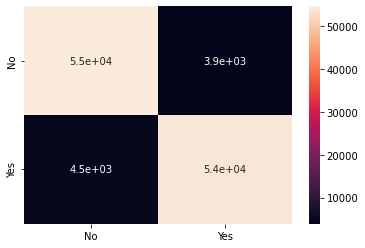

In [51]:
 # making confusion matrix 
plot_conf_matrix(y_test, y_pred)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     58461
           1       0.93      0.92      0.93     58508

    accuracy                           0.93    116969
   macro avg       0.93      0.93      0.93    116969
weighted avg       0.93      0.93      0.93    116969



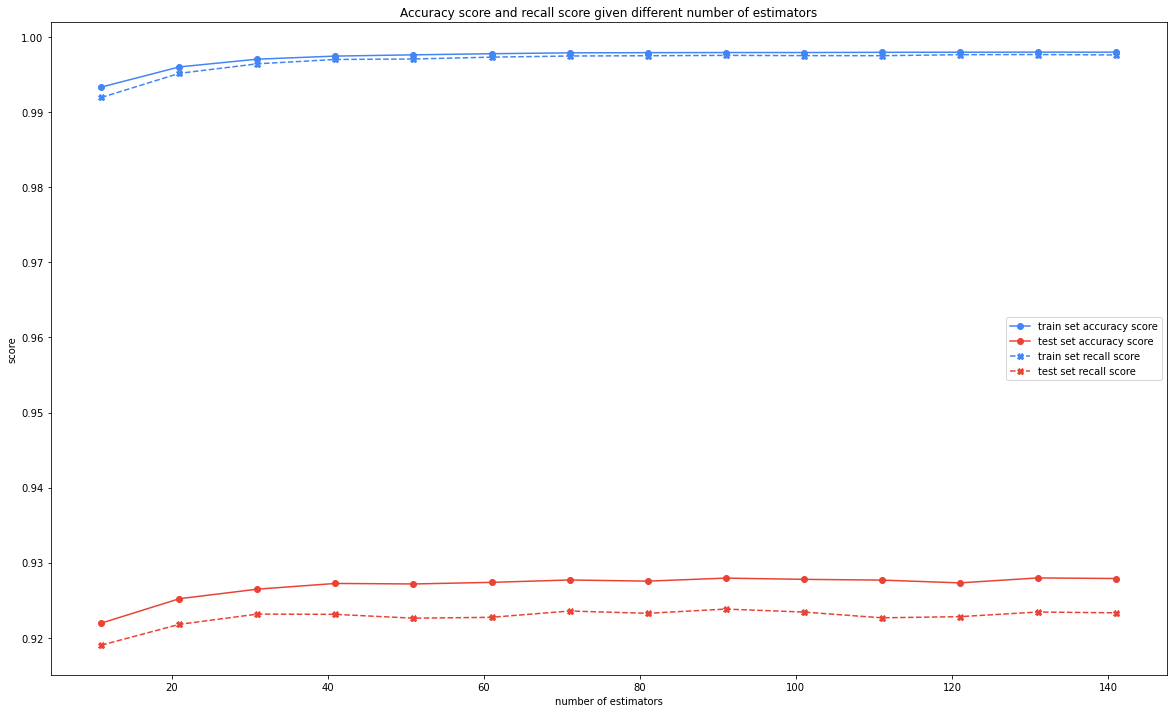

[11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141]
[0.921953680034881, 0.9252024040557755, 0.9264762458429157, 0.9272371312057041, 0.9271687370157905, 0.9273824688592704, 0.9276987919876206, 0.9275449050603152, 0.9279467209260573, 0.9277842847250126, 0.9276816934401423, 0.9273140746693569, 0.927972368747275, 0.9278954252836221]
[0.9933457931496341, 0.9960316989125763, 0.9970647395906309, 0.9974732062495398, 0.9976394426804912, 0.9977890554683474, 0.9979054209700133, 0.9979291690315778, 0.997945792674673, 0.9979481674808294, 0.9979742903485503, 0.9979909139916454, 0.9980004132162712, 0.9979956636039583]


In [53]:
# How n_estimators (The number of trees in the forest) affect the model
from sklearn.metrics import recall_score
test_accuracy_score = []
train_accuracy_score = []

test_recall_score = []
train_recall_score = []

n_estimators = [i for i in range(11, 150, 10)]
for n in n_estimators:
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    y_pred_n = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    acc_test = accuracy_score(y_test, y_pred_n)
    acc_training = accuracy_score(y_train, y_train_pred)
    test_accuracy_score.append(acc_test)
    train_accuracy_score.append(acc_training)
    test_recall_score.append(recall_score(y_test, y_pred_n))
    train_recall_score.append(recall_score(y_train, y_train_pred))

plt.figure(figsize=(20, 12))

plt.plot(n_estimators, train_accuracy_score, color="#4285f4", marker='o', label='train set accuracy score')
plt.plot(n_estimators, test_accuracy_score, color="#ea4335", marker='o', label='test set accuracy score')

plt.plot(n_estimators, train_recall_score, color="#4285f4", marker='X', label='train set recall score', linestyle='--')
plt.plot(n_estimators, test_recall_score, color="#ea4335", marker='X', label='test set recall score', linestyle='--')

plt.title('Accuracy score and recall score given different number of estimators')
plt.xlabel('number of estimators')
plt.ylabel('score')
plt.legend(loc='best')
plt.show()

print(n_estimators)
print(test_accuracy_score)
print(train_accuracy_score)


In [54]:
# print(classification_report(y_test, y_))

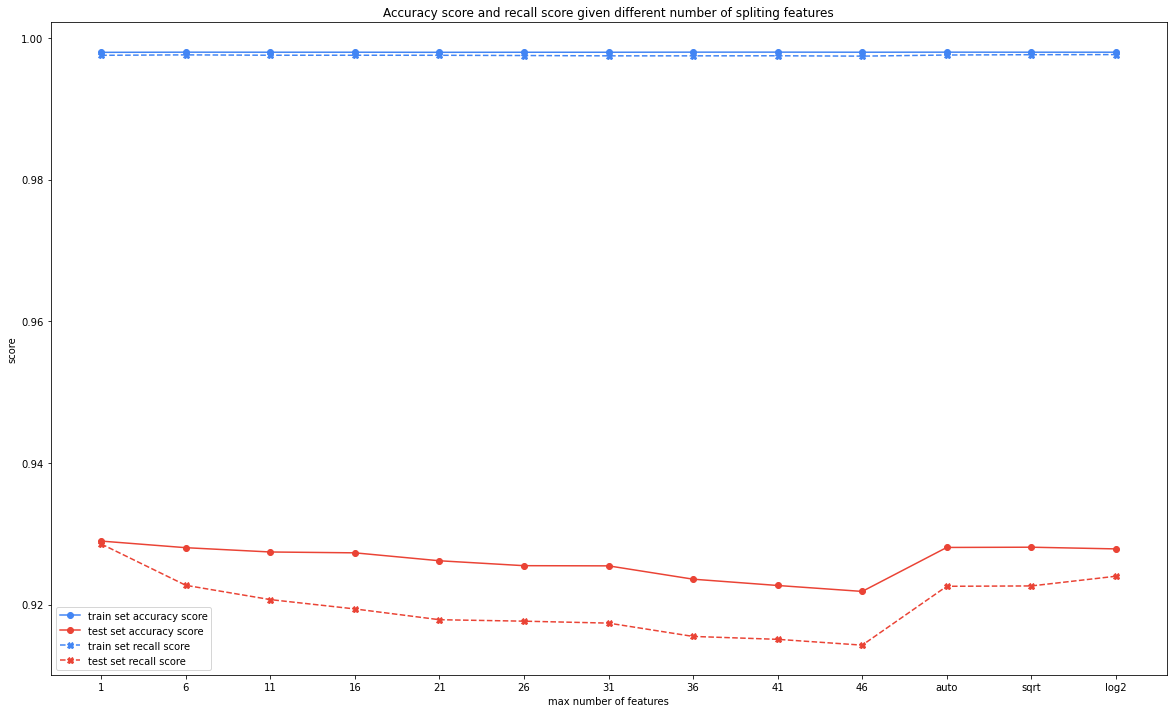

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 'auto', 'sqrt', 'log2']
[0.9289726337747608, 0.9280407629371885, 0.9274337645017056, 0.9273140746693569, 0.9261941198095222, 0.9255016286366473, 0.9254759808154297, 0.9235951405928067, 0.9227060161239302, 0.9218681872974891, 0.9280749600321453, 0.9281091571271021, 0.9278697774624046]
[0.9979552918992988, 0.9979766651547067, 0.9979719155423938, 0.9979719155423938, 0.9979600415116117, 0.997967165930081, 0.997967165930081, 0.9979814147670196, 0.9979837895731761, 0.9979719155423938, 0.9979790399608632, 0.9979742903485503, 0.9979742903485503]
[0.9285567785601969, 0.9227285157585288, 0.9207116975456348, 0.9193956382033226, 0.917874478703767, 0.9176693785465235, 0.917395911670199, 0.9155158268954673, 0.9151056265809804, 0.9142852259520066, 0.9225917823203664, 0.9226430573596773, 0.9240103917413003]
[0.9975350009617039, 0.9975957401577195, 0.9975451241610399, 0.9975451241610399, 0.9975400625613718, 0.9975046313636962, 0.9974590769666846, 0.997459076966684

In [55]:
# How max_features (The number of features to consider when looking for the best split) affect the model
test_accuracy_score = []
train_accuracy_score = []
test_recall_score = []
train_recall_score = []

features = [i for i in range(1, X.shape[1]+1, 5)] +['auto',"sqrt", "log2"]

for f in features:
    model = RandomForestClassifier(max_features=f)
    model.fit(X_train, y_train)
    y_pred_n = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    acc_test = accuracy_score(y_test, y_pred_n)
    acc_training = accuracy_score(y_train, y_train_pred)
    test_accuracy_score.append(acc_test)
    train_accuracy_score.append(acc_training)
    test_recall_score.append(recall_score(y_test, y_pred_n))
    train_recall_score.append(recall_score(y_train, y_train_pred))

plt.figure(figsize=(20, 12))

plt.plot(features, train_accuracy_score, color="#4285f4", marker='o', label='train set accuracy score')
plt.plot(features, test_accuracy_score, color='#ea4335', marker='o', label='test set accuracy score')

plt.plot(features, train_recall_score, color="#4285f4", marker='X', label='train set recall score', linestyle='--')
plt.plot(features, test_recall_score, color='#ea4335', marker='X', label='test set recall score', linestyle='--')

plt.title('Accuracy score and recall score given different number of spliting features')
plt.xlabel('max number of features')
plt.ylabel('score')
plt.legend(loc='best')
plt.show()

print(features)
print(test_accuracy_score)
print(train_accuracy_score)
print(test_recall_score)
print(train_recall_score)

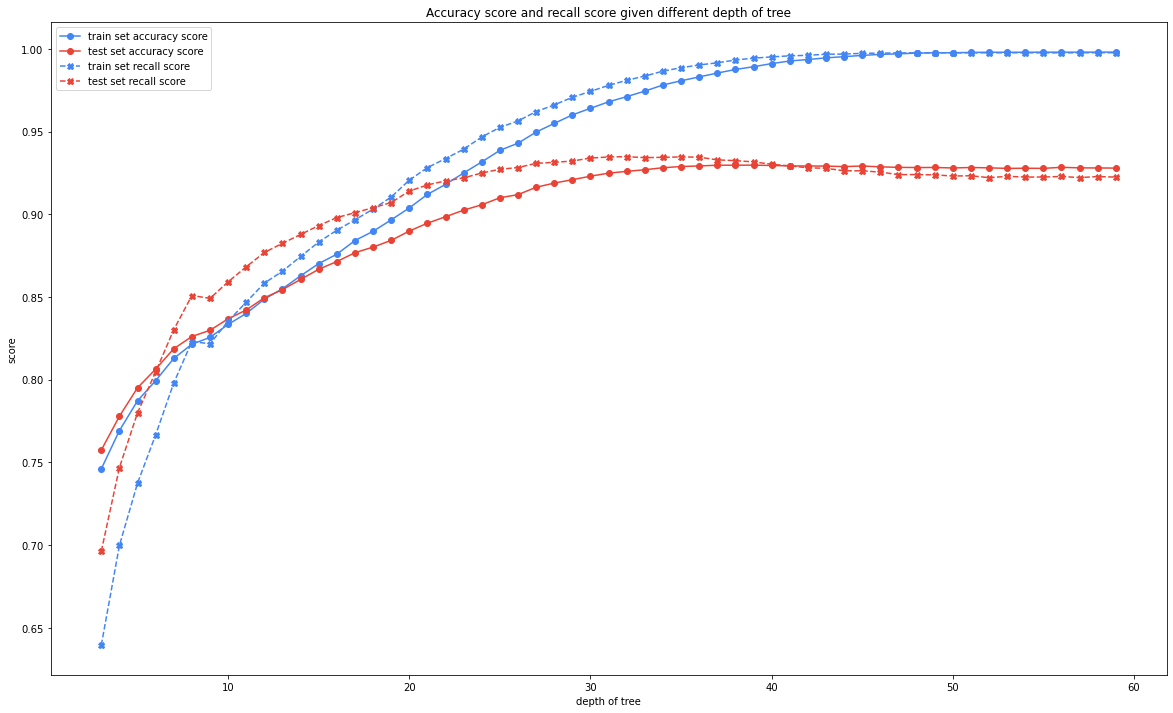

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[0.7574571040190136, 0.7778898682556917, 0.7951081055664321, 0.8063760483546922, 0.8187126503603519, 0.8260992228710171, 0.8298609033162633, 0.8367772657712728, 0.8421462096794877, 0.8494985850951962, 0.8544571638639298, 0.8605698945874548, 0.8667253716796758, 0.8714103736887552, 0.8767280219545349, 0.8801477314502133, 0.8842086364763313, 0.889825509322983, 0.8945789055219759, 0.8984773743470492, 0.9024698851832537, 0.9057100599304089, 0.90995049970505, 0.9118398892014123, 0.9162940608195334, 0.9188246458463354, 0.9208679222700031, 0.9229881421573237, 0.9248347852849901, 0.9259034445023895, 0.9268951602561363, 0.9281091571271021, 0.9288358453949337, 0.9291778163445016, 0.9296223785789397, 0.9296394771264181, 0.9296651249476356, 0.929459942377895, 0.9292034641657191, 0

In [66]:
# How max_depth (The maximum depth of the tree) affect the model
test_accuracy_score = []
train_accuracy_score = []
test_recall_score = []
train_recall_score = []

depths = [i for i in range(3, 60)]

for d in depths:
    model = RandomForestClassifier(max_depth=d)
    model.fit(X_train, y_train)
    y_pred_n = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    acc_test = accuracy_score(y_test, y_pred_n)
    acc_training = accuracy_score(y_train, y_train_pred)
    test_accuracy_score.append(acc_test)
    train_accuracy_score.append(acc_training)
    test_recall_score.append(recall_score(y_test, y_pred_n))
    train_recall_score.append(recall_score(y_train, y_train_pred))

plt.figure(figsize=(20, 12))

plt.plot(depths, train_accuracy_score, color='#4285f4', marker='o', label='train set accuracy score')
plt.plot(depths, test_accuracy_score, color='#ea4335', marker='o', label='test set accuracy score')

plt.plot(depths, train_recall_score, color='#4285f4', marker='X', label='train set recall score', linestyle='--')
plt.plot(depths, test_recall_score, color='#ea4335', marker='X', label='test set recall score', linestyle='--')

plt.title('Accuracy score and recall score given different depth of tree')
plt.xlabel('depth of tree')
plt.ylabel('score')
plt.legend(loc='best')
plt.show()

print(depths)
print(test_accuracy_score)
print(train_accuracy_score)
print(test_recall_score)
print(train_recall_score)


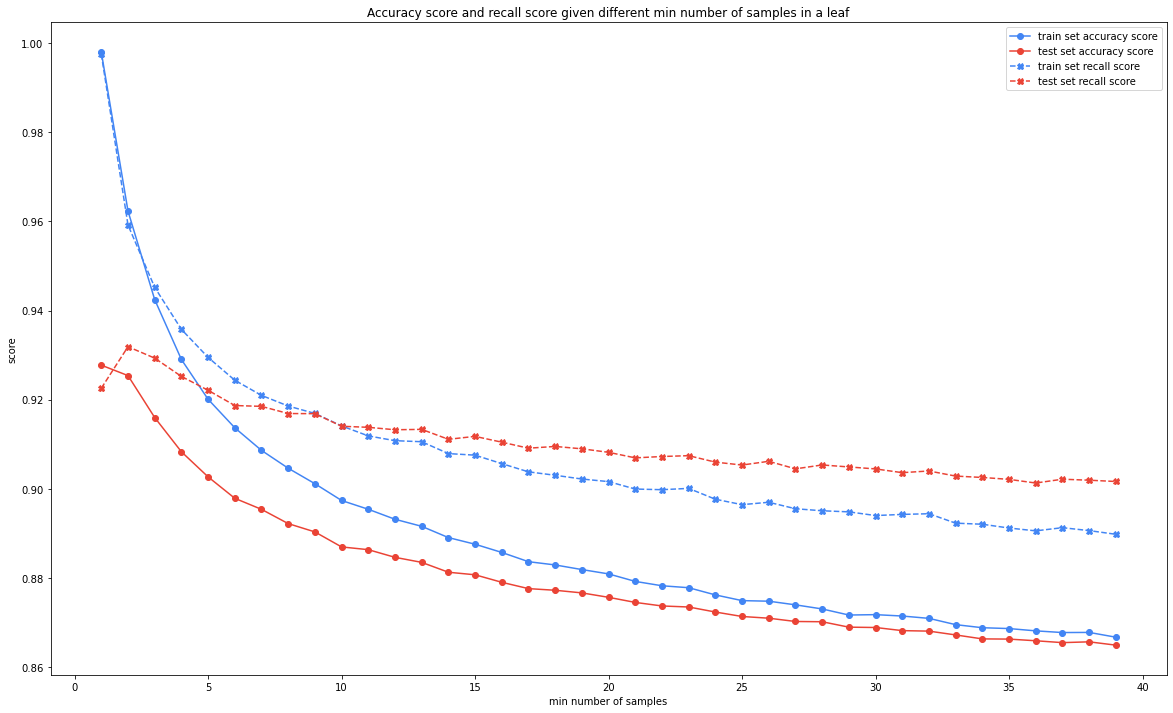

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
[0.9277500876300558, 0.9254075866255161, 0.9160033855124007, 0.9083261376946028, 0.9026921663004728, 0.8978874744590447, 0.8954081850746779, 0.8922107566962186, 0.8903470150210739, 0.8869786011678308, 0.8863630534586087, 0.8846446494370304, 0.8835161453034565, 0.8813018834050047, 0.8807290820644786, 0.879044875137857, 0.8776256956971505, 0.8772580769263651, 0.8766681770383606, 0.8756764612846138, 0.8745308586035616, 0.8737357761458164, 0.8735049457548582, 0.8723764416212842, 0.8713761765937984, 0.8709914592755346, 0.8702562217339637, 0.8701963768177893, 0.8689823799468235, 0.8689054364831708, 0.8682043960365567, 0.8680932554779471, 0.8672383281040276, 0.8663492036351512, 0.8663064572664552, 0.8659302892219306, 0.86551137480871, 0.8656909095572332, 0.8649471227419231]
[0.997962416317768, 0.962314201103335, 0.9424513224108082, 0.9290241684022

In [67]:
# How min_smaple_leaf (The minimum number of samples required to be at a leaf node) affect the model
test_accuracy_score = []
train_accuracy_score = []
test_recall_score = []
train_recall_score = []

leaves = [i for i in range(1, 40)]

for l in leaves:
    model = RandomForestClassifier(min_samples_leaf=l)
    model.fit(X_train, y_train)
    y_pred_n = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    acc_test = accuracy_score(y_test, y_pred_n)
    acc_training = accuracy_score(y_train, y_train_pred)
    test_accuracy_score.append(acc_test)
    train_accuracy_score.append(acc_training)
    test_recall_score.append(recall_score(y_test, y_pred_n))
    train_recall_score.append(recall_score(y_train, y_train_pred))

plt.figure(figsize=(20, 12))

plt.plot(leaves, train_accuracy_score, color='#4285f4', marker='o', label='train set accuracy score')
plt.plot(leaves, test_accuracy_score, color='#ea4335', marker='o', label='test set accuracy score')

plt.plot(leaves, train_recall_score, color='#4285f4', marker='X', label='train set recall score', linestyle='--')
plt.plot(leaves, test_recall_score, color='#ea4335', marker='X', label='test set recall score', linestyle='--')

plt.title('Accuracy score and recall score given different min number of samples in a leaf')
plt.xlabel('min number of samples')
plt.ylabel('score')
plt.legend(loc='best')
plt.show()

print(leaves)
print(test_accuracy_score)
print(train_accuracy_score)
print(test_recall_score)
print(train_recall_score)

In [68]:
# train the model with params that fits the data well and without causing overfitting
rf_best = RandomForestClassifier(n_estimators=131, max_features='log2', max_depth=35, min_samples_leaf=2)
rf_best.fit(X_train, y_train)
y_pred_best = rf_best.predict(X_test)

In [69]:
acc_train = accuracy_score(y_train, rf_best.predict(X_train))
acc_train

0.9455266963834077

In [70]:
acc = accuracy_score(y_test, y_pred_best)
acc

0.9181919995896348

In [71]:
recall_train = recall_score(y_train, rf_best.predict(X_train))
recall_train

0.9502545984632983

In [72]:
recall = recall_score(y_test, y_pred_best)
recall

0.9330860736993232

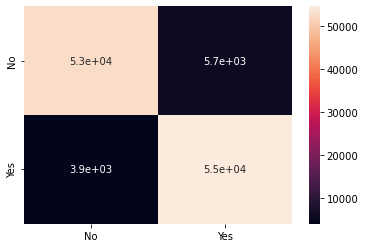

In [73]:
plot_conf_matrix(y_test, y_pred_best)

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92     58461
           1       0.91      0.93      0.92     58508

    accuracy                           0.92    116969
   macro avg       0.92      0.92      0.92    116969
weighted avg       0.92      0.92      0.92    116969



In [76]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf_best, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X.columns.tolist(), top=None)

In [77]:
rf_best = RandomForestClassifier(n_estimators=131, max_features=25, max_depth=27, min_samples_leaf=10)
rf_best.fit(X_train, y_train)
y_pred_best = rf_best.predict(X_test)

In [78]:
from joblib import dump, load

In [80]:
dump(rf_best, './rf-best-prediction-model.joblib')

['./rf-best-prediction-model.joblib']

In [81]:
rf_best = load('./rf-best-prediction-model.joblib')